Für dieses Projekt benutze ich das Dataset von Kaggle : Google Play Store Apps 
    
    Beschreibung von Kaggle:
Context

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
Content

Each app (row) has values for catergory, rating, size, and more.
Acknowledgements

This information is scraped from the Google Play Store. This app information would not be available without it.
Inspiration

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!
 
    
Spalten:

Application name
Category - Category the app belongs to
Rating - Overall user rating of the app (as when scraped)

Reviews - Number of user reviews for the app (as when scraped)

Size - Size of the app (as when scraped)

Installs - Number of user downloads/installs for the app (as when scraped)

Type - Paid or Free

Price - Price of the app (as when scraped)

Content Rating - Age group the app is targeted at - Children / Mature 21+ / Adult

Genres -An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.

Last Updated - Date when the app was last updated on Play Store (as when scraped)

Current Ver - Current version of the app available on Play Store (as when scraped)

Android Ver - Min required Android version (as when scraped)

# Data Preprocessing und Vorbereitung

In [3]:
#Zuerst importiere die notwendigen Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#Lese das Dataset ein:
df = pd.read_csv('googleplaystore.csv')

In [9]:
#Daten anschauen
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
#Ersetzte Leerzeichen in Spaltennamen
df.columns = data.columns.str.replace(' ', '_')

In [11]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
print('Einträge, Spalten:', df.shape)
print('Datentypen:', df.dtypes.value_counts())

Einträge, Spalten: (10841, 13)
Datentypen: object     12
float64     1
dtype: int64


In [14]:
#Wir haben also 1 numerische Spalte, offensichtlich Rating und 12 objekt Spalten
#Wir schauen uns die einzelne Spalten genauer an und bereinigen es ggf.

# Size

In [18]:
#Zuerst kläre ich, wie sehen die Werte in dieser Spalte aus
df['Size'].value_counts().head(10)

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
Name: Size, dtype: int64

In [20]:
#Man sieht, dass die Dateigrößen mit Präfixen kommen. z.B. M für Mega. Ich ersetzte diese durch die entsprechende Werte -> 1000000 bei Mega, 1000 bei k
#So werden die Daten in numerische konvertiert
df['Size'] = df['Size'].str.replace('M', 'e+6')
df['Size'] = df['Size'].str.replace('k', 'e+3')

In [23]:
df.Size.tail()

10836                 53e+6
10837                3.6e+6
10838                9.5e+6
10839    Varies with device
10840                 19e+6
Name: Size, dtype: object

In [24]:
#Nun gibt es zwei Typen der Daten in der Spalte 'Size': daten mit 'e+', die in numerische Werte umgewandelt werden können
#und Strings, die nicht ins numerische konvergiert werden können, z.B. 'Varies with device'
#definiere die Funktion für die Konvertierung der Werte, die konvertiert werden können:
def convert_possible(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

In [25]:
konvertierbar = df['Size'].apply(lambda x: convert_possible(x))

In [26]:
konvertierbar.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [29]:
#Wie viele nicht-numerische Einträge bleiben in Size?
df['Size'][~konvertierbar].value_counts()

Varies with device    1695
1,000+                   1
Name: Size, dtype: int64

In [37]:
#Ersetze 'Varies with device' mit NaN und konvertiere 1000+ in 1000
df['Size']= df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].replace('1,000+', 1000)

In [38]:
#nun konvertiere ich die bereinigte Daten in numerische Form
df['Size'] = pd.to_numeric(df['Size'])

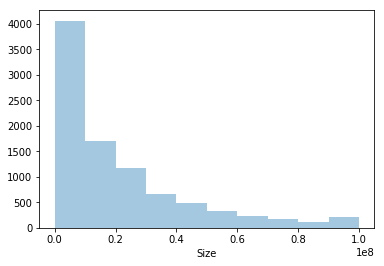

In [50]:
sns.distplot(df.Size.dropna(), kde=False, bins = 10)

# Installs

In [51]:
#Schaffe einen Überblick über die Spalte Installs:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [52]:
#Den Wert 'Free' kann ich entfernen, da nicht relevant.  Der Rest ist numerisch, nur mit '+' am ende. '+' entferne ich zunächst.
df['Installs']= df['Installs'].apply(lambda x: x.strip('+'))
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', ''))
df['Installs'] = df['Installs'].replace('Free', np.nan)

In [64]:
df['Installs'].value_counts()

1.000000e+06    1579
1.000000e+07    1252
1.000000e+05    1169
1.000000e+04    1054
1.000000e+03     907
5.000000e+06     752
1.000000e+02     719
5.000000e+05     539
5.000000e+04     479
5.000000e+03     477
1.000000e+08     409
1.000000e+01     386
5.000000e+02     330
5.000000e+07     289
5.000000e+01     205
5.000000e+00      82
5.000000e+08      72
1.000000e+00      67
1.000000e+09      58
0.000000e+00      15
Name: Installs, dtype: int64

In [54]:
#Konvertiere die Daten in numerische Form:
df.Installs = pd.to_numeric(df.Installs)

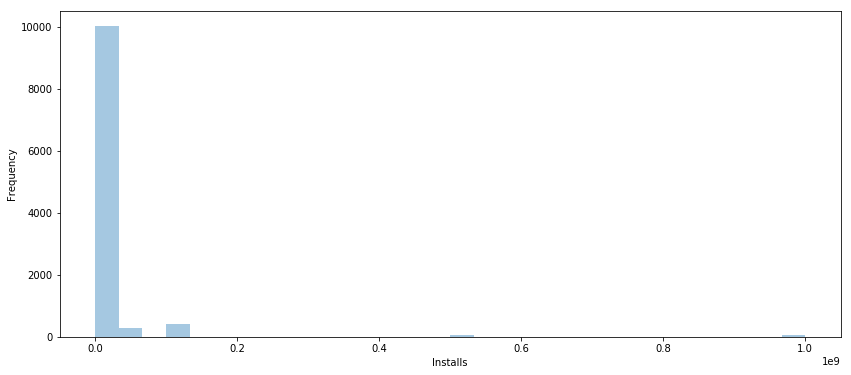

In [63]:
plt.figure(figsize=(14,6))
plt.ylabel('Frequency')
sns.distplot(df.Installs.dropna(), bins = 30, kde = False)

# Reviews

In [65]:
#Sind alle Einträge numerisch?
len(df.Reviews)

10841

In [66]:
df.Reviews.str.isnumeric().sum()

10840

In [67]:
#1 Eintrag ist nicht numerisch. Welcher?
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [68]:
#dieser Eintrag ist merkwürdig. Die Daten scheinen durcheinander zu sein. Ich entferne diese Zeile
df = df.drop(df.index[10472])

In [71]:
#konvertiere die Daten in numerische
df['Reviews'] = pd.to_numeric(df.Reviews)

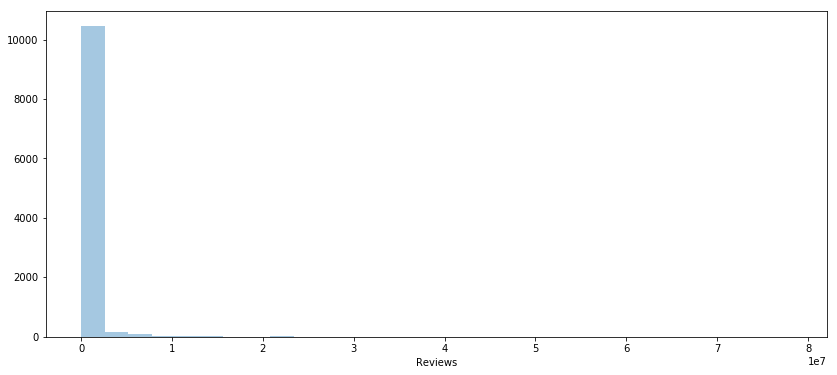

In [77]:
#Schauen wir uns die Verteilung an
plt.figure(figsize=(14,6))
sns.distplot(df['Reviews'], kde=False, bins = 30)

# Rating

In [78]:
#Wie gewohnt, fange ich mit dem kennenlernen an:
df['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [80]:
df.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [81]:
#Wir sehen, dass der minimale Rating bei 1.0 liegt und der maximale bei 5.0. Die Daten scheinen richtig zu sein.
#Oben haben wir bereits gesehen, dass Rating als einzige Spalte bereits numerisch war.
#Überprüfe die Nullvalues
df['Rating'].isnull().sum()

1474

Text(0, 0.5, 'Frequency')

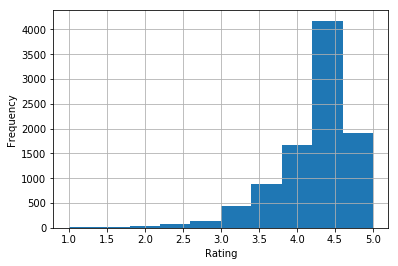

In [83]:
#Und schaue die Verteilung an:

df.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')



In [84]:
#Wir sehen eine klare Verschiebung in Richtung 'Guter' Bewertungen

# Type

In [85]:
#Welche Typen der Apps gibt es?
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [86]:
#Es gibt nur die kostenlose und die kostenpflichtigen Apps. Dies sind kategorische Daten in bereits passender Form.

# Price

In [90]:
df['Price'].value_counts().head()

0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
Name: Price, dtype: int64

In [103]:
#10040 Einträge haben den Wert 0
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [104]:
#Das $ Zeichen muss entfernt werden
df.Price = df.Price.str.replace('$', '')

In [107]:
#konvertiere ins Numerische:
df['Price']=pd.to_numeric(df['Price'])

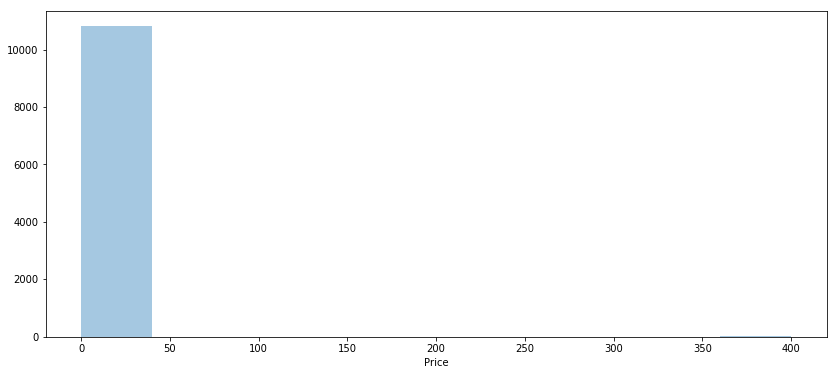

In [112]:
#Schauen wir uns die graphische Darstellung an
plt.figure(figsize=(14,6))
sns.distplot(df.Price, kde = False, bins = 10)

In [116]:
#Es gibt tatsächlich Apps, die über 300$ kosten
df[df.Price > 300].sort_values(by = 'Price', ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965000.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2700000.0,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2700000.0,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up


# Category

In [117]:
#Welche Kategorien gibt es?
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1008x432 with 0 Axes>

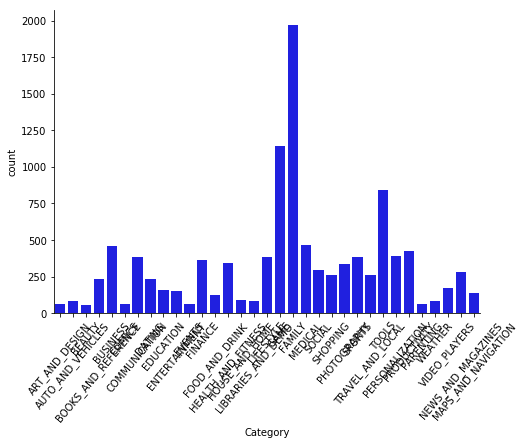

In [129]:
plt.figure(figsize=(14,6))
g = sns.factorplot("Category", data=df, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=50)

In [130]:
#Category scheint in Orndung zu sein

# Content Rating

In [131]:
df['Content_Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64

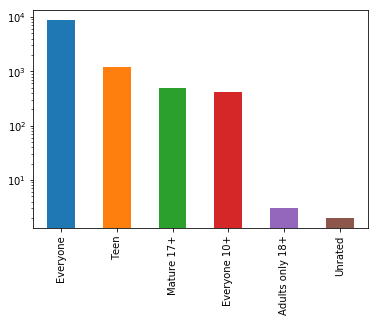

In [134]:
#Sieht gut aus. Keine Wiederholungen oder Unklarheiten
df.Content_Rating.value_counts().plot(kind='bar')
plt.yscale('log')

# Genres

In [136]:
df['Genres'].value_counts().head(10)

Tools              842
Entertainment      623
Education          549
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    392
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

In [137]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [138]:
#hier könnte man die Kategorien, die durch ';' getrennt sind, aufteilen. Eventuell komme ich dazu später

# Last Update

In [145]:
#Konvertiere die Srtings in datetime
from datetime import datetime, date

In [148]:
lastupdated = pd.to_datetime(df.Last_Updated)

In [151]:
#Eine bessere Idee bei solchen Datn ist die Anzahl der Tage, die seit dem leztten Update vergangen sind:
df['Last_Updated_Days_Ago'] = lastupdated.apply(lambda x: date.today()- datetime.date(x))

In [153]:
df.Last_Updated_Days_Ago.head(10)

0   485 days
1   477 days
2   279 days
3   333 days
4   321 days
5   772 days
6   376 days
7   327 days
8   594 days
9   308 days
Name: Last_Updated_Days_Ago, dtype: timedelta64[ns]